In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz

In [2]:
rawData= pd.read_csv('train.csv')

In [3]:
rawData.info()
# Score when rf, depth 5: 0.785
# Score when rf, depth 20: 0.737
# Score when dt, depth 5: 0.732
# Score when rf, depth 20: 0.646

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
rawData['Cabin'].fillna('No_Cabin', inplace= True)

rawData= rawData[rawData['Embarked'].isnull() == False]
Cabin_char= lambda x: x[0]+str(len(x.split()))
rawData['Cabin']= rawData['Cabin'].map(Cabin_char)

In [5]:
rawData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N1,S


In [6]:
rawData_y= rawData['Survived']

In [7]:
rawData_X= rawData.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis= 1)

In [8]:
rawData_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,N1,S
1,1,female,38.0,1,0,71.2833,C1,C
2,3,female,26.0,0,0,7.9250,N1,S
3,1,female,35.0,1,0,53.1000,C1,S
4,3,male,35.0,0,0,8.0500,N1,S


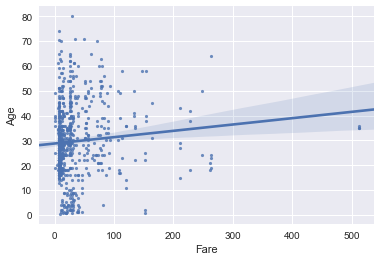

In [9]:
sns.set()
sns.regplot(x= rawData_X.Fare, y= rawData_X.Age, scatter_kws= {'s': 10})
plt.show()

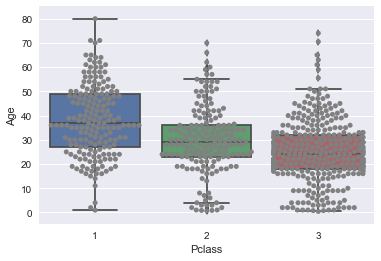

In [10]:
grp= sns.boxplot(x= 'Pclass', y= 'Age', data= rawData_X)
grp= sns.swarmplot(x= 'Pclass', y= 'Age', data= rawData_X, color= 'grey')
plt.show()

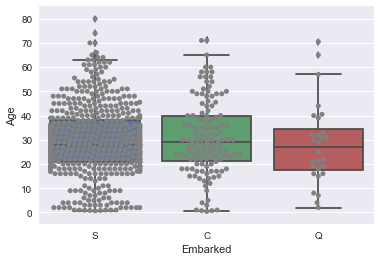

In [11]:
grp= sns.boxplot(x= 'Embarked', y= 'Age', data= rawData_X)
grp= sns.swarmplot(x= 'Embarked', y= 'Age', data= rawData_X, color= 'grey')
plt.show()

In [12]:
for i in rawData_X['Pclass'].unique().tolist():
    print('Pclass {}: mean {:0.3f}, std {:0.3f}, count:{}'.format(
        i,
        rawData_X.loc[rawData_X['Pclass']== i, 'Age'].mean(),
        rawData_X.loc[rawData_X['Pclass']== i, 'Age'].std(),
        rawData_X.loc[rawData_X['Pclass']== i, 'Age'].count()
    ))

Pclass 3: mean 25.141, std 12.495, count:355
Pclass 1: mean 38.106, std 14.779, count:184
Pclass 2: mean 29.878, std 14.001, count:173


In [13]:
for i in rawData_X['Embarked'].unique().tolist():
    print('Embarked {}: mean {:0.3f}, std {:0.3f}, count:{}'.format(
        i,
        rawData_X.loc[rawData_X['Embarked']== i, 'Age'].mean(),
        rawData_X.loc[rawData_X['Embarked']== i, 'Age'].std(),
        rawData_X.loc[rawData_X['Embarked']== i, 'Age'].count()
    ))

Embarked S: mean 29.445, std 14.143, count:554
Embarked C: mean 30.815, std 15.435, count:130
Embarked Q: mean 28.089, std 16.915, count:28


In [14]:
for i in rawData_X['Cabin'].unique().tolist():
    print('Cabin {}: mean {:0.3f}, std {:0.3f}, count:{}'.format(
        i,
        rawData_X.loc[rawData_X['Cabin']== i, 'Age'].mean(),
        rawData_X.loc[rawData_X['Cabin']== i, 'Age'].std(),
        rawData_X.loc[rawData_X['Cabin']== i, 'Age'].count()
    ))

Cabin N1: mean 27.555, std 13.473, count:529
Cabin C1: mean 38.709, std 11.757, count:43
Cabin E1: mean 38.117, std 12.590, count:30
Cabin G1: mean 14.750, std 13.745, count:4
Cabin D1: mean 39.567, std 14.393, count:30
Cabin A1: mean 44.833, std 20.171, count:12
Cabin C3: mean 32.500, std 21.111, count:4
Cabin B1: mean 35.875, std 15.884, count:32
Cabin F1: mean 16.688, std 15.618, count:8
Cabin F2: mean 28.667, std 11.930, count:3
Cabin D2: mean 23.000, std nan, count:1
Cabin B2: mean 31.000, std 15.133, count:7
Cabin C2: mean 11.480, std 11.926, count:4
Cabin B4: mean 19.500, std 2.121, count:2
Cabin T1: mean 45.000, std nan, count:1
Cabin B3: mean 34.500, std 2.121, count:2


In [15]:
rawData_X[rawData_X['Cabin']=='B3']

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
679,1,male,36.0,0,1,512.3292,B3,C
872,1,male,33.0,0,0,5.0000,B3,S


In [16]:
rawData_X.loc[rawData_X['Age'].isnull(),:].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [17]:
rawData_X.loc[5, 'Cabin']

'N1'

In [18]:
for i in rawData_X.loc[rawData_X['Age'].isnull(),:].index.tolist():
    cabin_set= rawData_X.loc[i, 'Cabin']
    mean, std= (
        rawData_X.loc[rawData_X['Cabin']== cabin_set, 'Age'].mean(),
        rawData_X.loc[rawData_X['Cabin']== cabin_set, 'Age'].std()
        )
    rawData_X.at[i, 'Age']= np.around(np.random.normal(mean, std, 1))

In [19]:
rawData_X.loc[[5, 17, 19, 26], :]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,3,male,7.0,0,0,8.4583,N1,Q
17,2,male,29.0,0,0,13.0000,N1,S
19,3,female,21.0,0,0,7.2250,N1,C
26,3,male,25.0,0,0,7.2250,N1,C


In [20]:
rawData_X= pd.get_dummies(rawData_X)

In [21]:
rawData_X.isnull().any()

Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_female    False
Sex_male      False
Cabin_A1      False
Cabin_B1      False
Cabin_B2      False
Cabin_B3      False
Cabin_B4      False
Cabin_C1      False
Cabin_C2      False
Cabin_C3      False
Cabin_D1      False
Cabin_D2      False
Cabin_E1      False
Cabin_F1      False
Cabin_F2      False
Cabin_G1      False
Cabin_N1      False
Cabin_T1      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [22]:
testData= pd.read_csv('test.csv')

In [23]:
testData.info()
# Score when rf, depth 5: 0.785
# Score when rf, depth 20: 0.737
# Score when dt, depth 5: 0.732
# Score when rf, depth 20: 0.646

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
testData['Cabin'].fillna('No_Cabin', inplace= True)

testData= testData[testData['Embarked'].isnull() == False]
Cabin_char= lambda x: x[0]+str(len(x.split()))
testData['Cabin']= testData['Cabin'].map(Cabin_char)

In [25]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N1,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N1,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N1,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N1,S


In [26]:
testData_X= testData.drop(['PassengerId', 'Name', 'Ticket'], axis= 1)

In [27]:
testData_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,N1,Q
1,3,female,47.0,1,0,7.0000,N1,S
2,2,male,62.0,0,0,9.6875,N1,Q
3,3,male,27.0,0,0,8.6625,N1,S
4,3,female,22.0,1,1,12.2875,N1,S


In [28]:
for i in testData_X.loc[testData_X['Age'].isnull(),:].index.tolist():
    cabin_set= testData_X.loc[i, 'Cabin']
    mean, std= (
        testData_X.loc[testData_X['Cabin']== cabin_set, 'Age'].mean(),
        testData_X.loc[testData_X['Cabin']== cabin_set, 'Age'].std()
        )
    testData_X.at[i, 'Age']= np.around(np.random.normal(mean, std, 1))

In [29]:
testData_X= pd.get_dummies(testData_X)

In [30]:
testData_X.isnull().any()

Pclass        False
Age           False
SibSp         False
Parch         False
Fare           True
Sex_female    False
Sex_male      False
Cabin_A1      False
Cabin_B1      False
Cabin_B2      False
Cabin_B3      False
Cabin_B4      False
Cabin_C1      False
Cabin_C2      False
Cabin_C3      False
Cabin_D1      False
Cabin_D2      False
Cabin_E1      False
Cabin_E2      False
Cabin_F1      False
Cabin_F2      False
Cabin_G1      False
Cabin_N1      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [31]:
testData_X['Cabin_E1']= testData_X['Cabin_E1']+ testData_X['Cabin_E2']
testData_X= testData_X.drop('Cabin_E2', axis= 1)
testData_X['Cabin_T1']= 0

In [32]:
rawData_X.columns== testData_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False], dtype=bool)

In [33]:
testData_X['Fare'].fillna(0, inplace= True)

In [34]:
testData_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A1,Cabin_B1,Cabin_B2,...,Cabin_D2,Cabin_E1,Cabin_F1,Cabin_F2,Cabin_G1,Cabin_N1,Embarked_C,Embarked_Q,Embarked_S,Cabin_T1
0,3,34.5,0,0,7.8292,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [104]:
X_train, X_test, Y_train, Y_test= train_test_split(
    rawData_X, rawData_y, test_size= 0.8, random_state= 42
)
tune_param= {
            'n_estimators': [5, 7, 10, 12, 15, 17, 20],
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 7, 10, 12, 15, 17, 20]
            }

In [105]:
clf= GridSearchCV(RandomForestClassifier(), tune_param, cv= 5)
clf.fit(X_train, Y_train)
print('Best parameters found: {}'.format(clf.best_params_))

Best parameters found: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 20}


In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print('Grid Scores found:\n')
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(mean, std * 2, params))
    
# expected score: 0.859

In [121]:
clf= RandomForestClassifier(n_estimators= 20, max_depth= 15, random_state= 42)
clf.fit(rawData_X, rawData_y)
testData_Y= clf.predict(testData_X)

In [122]:
clf.feature_importances_

array([  8.47980702e-02,   2.22835382e-01,   4.80682959e-02,
         4.16469806e-02,   1.86089942e-01,   1.17281479e-01,
         1.82355842e-01,   2.40756239e-03,   4.75521258e-03,
         3.12827476e-03,   1.27363563e-03,   1.94039076e-05,
         4.19277611e-03,   4.79235898e-03,   1.15594879e-03,
         5.96969873e-03,   1.30202432e-03,   9.35017649e-03,
         1.59784002e-03,   8.57819371e-04,   8.96178771e-04,
         3.32534993e-02,   5.71751107e-04,   1.64637382e-02,
         1.05028535e-02,   1.44332545e-02])

In [123]:
pd.Series(testData_Y).to_csv('result_rf_best_params.csv', index= False)

In [125]:
export_graphviz(
    clf.estimators_, 
    feature_names= rawData_X.columns.values.tolist(),
    out_file= 'rf_best_params.dot'
    )

TypeError: [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1608637542, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1273642419, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1935803228, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=787846414, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=996406378, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1201263687, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=423734972, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=415968276, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=670094950, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1914837113, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=669991378, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=429389014, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=249467210, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1972458954, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1572714583, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1433267572, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=434285667, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=613608295, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=893664919, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=648061058, splitter='best')] is not an estimator instance.

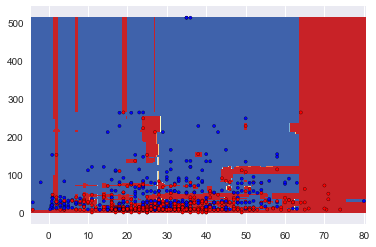

In [40]:
clf= RandomForestClassifier(n_estimators= 20, max_depth= 15, random_state= 42)
clf.fit(rawData_X[['Age', 'Fare']], rawData_y)

x_axis, y_axis= rawData_X['Age'], rawData_X['Fare']
xx, yy = np.meshgrid(np.arange(x_axis.min() -0.5, x_axis.max() +0.5, 0.05),
                     np.arange(y_axis.min() -0.5, y_axis.max() +0.5, 0.05))
Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)
cs= plt.contourf(xx, yy, Z, cmap= plt.cm.RdYlBu)
plt.scatter(x_axis, y_axis, c= rawData_y, cmap= ListedColormap(['r', 'b']), edgecolor= 'k', s= 10)
plt.show()